In [45]:
# coding: shift-jis
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_amazon = pd.read_csv('api_data_smart_watches.csv')

# レビュー値の分布より企業分類
- レビュー件数が10件以上が対象
- 成功企業はレビュー値が4.0以上の企業→サムスン、エイサス、ペブル
- 比較対象はレビュー値が3.5以上、3.8以下の企業→ソニー、モトローラ、ファーウェイ

In [46]:
data_amazon.columns

Index([u'asin', u'date', u'manufacturer', u'price', u'rank', u'average_rate',
       u'num_of_rate', u'review_url'],
      dtype='object')

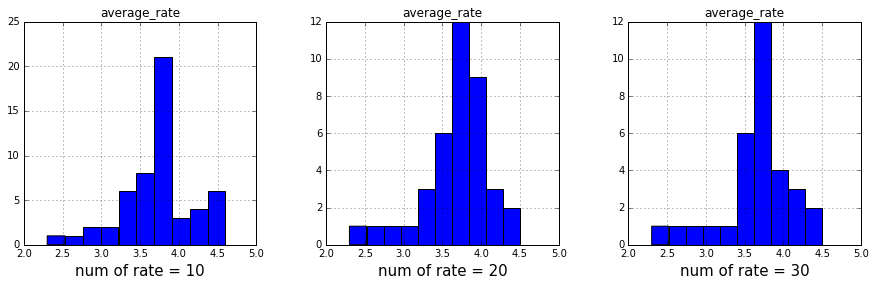

In [47]:
fig = plt.figure(figsize=(15,4))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)
data_amazon[data_amazon['num_of_rate'] >= 10].hist('average_rate',ax=ax1,bins=10)
data_amazon[data_amazon['num_of_rate'] >= 20].hist('average_rate',ax=ax2,bins=10)
data_amazon[data_amazon['num_of_rate'] >= 30].hist('average_rate',ax=ax3,bins=10)
ax1.set_xlabel("num of rate = 10",fontsize=15)
ax2.set_xlabel("num of rate = 20",fontsize=15)
ax3.set_xlabel("num of rate = 30",fontsize=15)
plt.show()

In [63]:
data_10 = data_amazon[data_amazon[u'num_of_rate'] >= 10]
#succeed
suc = data_10[data_10['average_rate']>=4.0]
print('succeeded companies are \n%s') %suc[u'manufacturer'].unique()
#normal
normal = data_10[(data_10['average_rate'] >= 3.5) & (data_10['average_rate'] <= 3.8)]
print('\nnormal companies are \n%s') %str(normal[u'manufacturer'].unique()).decode('string-escape')
#fale
fale = data_10[data_10['average_rate'] < 3.5]
print('\nfalse companies are \n%s') %str(fale[u'manufacturer'].unique()).decode('string-escape')

succeeded companies are 
['EloBeth' 'OEM' 'Pebble' 'ASUSTek' 'Samsung' 'by Galaxy']

normal companies are 
['null' 'OZONE' 'Sony' 'Pebble' 'Withings'
 'ソニー' 'Motorola' 'Shenzhen Wave' 'HUAWEI'
 'Leesentec(リーセンテック)']

false companies are 
['Shenzhen Wave' 'STK'
 'ネット販売専門'
 'Eagle　Eye' 'MisSmart'
 'Sleep tracker(スリープトラッカー)'
 nan 'Sony' 'Sincere　Inc.' 'Withings' 'Samsung']


# 分析

In [80]:
company_suc = [u'サムスン',u'ASUSTEK COMPUTER INC.','ペブルテクノロジー']
company_nor = [u'モトローラ',u'ソニー',u'ファーウェイ']
data_pat = pd.read_csv('/home/kyohei/wearable/data/01.文献リスト_特許.csv',encoding='SHIFT-JIS')
categories = pd.read_csv('/home/kyohei/wearable/data/T_小区分.csv',encoding='SHIFT-JIS')
data_suc_pat = data_pat[data_pat[u"筆頭出願人名"].isin(company_suc)]
data_fal_pat = data_pat[data_pat[u"筆頭出願人名"].isin(company_nor)]

In [81]:
data_suc_pat_watch = data_suc_pat[data_suc_pat[u"B0302"]==1]
data_fal_pat_watch = data_fal_pat[data_fal_pat[u"B0302"]==1]
print("成功企業の内訳\n%s"%data_suc_pat_watch[u'筆頭出願人名'].value_counts())
print("\n非成功企業の内訳\n%s"%data_fal_pat_watch[u'筆頭出願人名'].value_counts())

成功企業の内訳
サムスン                     134
ASUSTEK COMPUTER INC.      5
Name: 筆頭出願人名, dtype: int64

非成功企業の内訳
ソニー       36
モトローラ      9
ファーウェイ     1
Name: 筆頭出願人名, dtype: int64


In [82]:
data_suc_cal = data_suc_pat_watch.iloc[:,19:].count() / float(data_suc_pat_watch.shape[0])
data_fal_cal = data_fal_pat_watch.iloc[:,19:].count() / float(data_fal_pat_watch.shape[0])
compare_category = pd.concat([data_suc_cal,data_fal_cal],axis=1)
compare_category.rename(columns={0:"succeed",1:"normal"},inplace=True)
compare_category["diff"] = compare_category["succeed"] - compare_category["normal"]
compare_category["diff_abs"] = abs(compare_category["succeed"] - compare_category["normal"])

categories = categories.set_index(u"記号",drop=True)
compare_category = pd.concat([compare_category,categories],axis=1)

### プラス域

In [83]:
compare_category.sort_values('diff',ascending=False).head(20)

,succeed,normal,diff,diff_abs,小区分
B9998,0.381295,0.043478,0.337817,0.337817,種別に関し非限定
C0104,0.503597,0.173913,0.329684,0.329684,操作性の向上
D0398,0.374101,0.086957,0.287144,0.287144,演算・インターフェイス装置に関し非限定
B0198,0.330935,0.065217,0.265718,0.265718,HMD・眼鏡型に関し非限定
D0501,0.712230,0.478261,0.233969,0.233969,ディスプレイ
A0198,0.424460,0.195652,0.228808,0.228808,パッシブ・オートノマスに関し非限定
H0102,0.395683,0.173913,0.221770,0.221770,BtoC（個人向け）
D0404,0.244604,0.043478,0.201126,0.201126,高精度情報化
D0104,0.172662,0.000000,0.172662,0.172662,小型・軽量化
D0406,0.244604,0.086957,0.157648,0.157648,タッチパネル


### マイナス域 

In [84]:
compare_category.sort_values('diff',ascending=True).head(30)

,succeed,normal,diff,diff_abs,小区分
D0302,0.086331,0.434783,-0.348452,0.348452,中央演算装置（CPU）
G0105,0.071942,0.391304,-0.319362,0.319362,サーバー
I0601,0.000000,0.282609,-0.282609,0.282609,お知らせ・注意・指示
C0107,0.050360,0.326087,-0.275727,0.275727,ユーザー状態の正確な把握
J0403,0.000000,0.260870,-0.260870,0.260870,スポーツ施設（競技場、練習場、フィットネスクラブなど）
H0302,0.014388,0.260870,-0.246481,0.246481,健康
D0702,0.064748,0.304348,-0.239600,0.239600,WiＦｉ
D0703,0.064748,0.304348,-0.239600,0.239600,BlueＴooth
F0205,0.000000,0.239130,-0.239130,0.239130,発汗
F0602,0.000000,0.239130,-0.239130,0.239130,湿度


### 絶対値

In [87]:
compare_category[compare_category['diff_abs'] >= 0.2].sort_values('diff_abs',ascending=False)

,succeed,normal,diff,diff_abs,小区分
D0302,0.086331,0.434783,-0.348452,0.348452,中央演算装置（CPU）
B9998,0.381295,0.043478,0.337817,0.337817,種別に関し非限定
C0104,0.503597,0.173913,0.329684,0.329684,操作性の向上
G0105,0.071942,0.391304,-0.319362,0.319362,サーバー
D0398,0.374101,0.086957,0.287144,0.287144,演算・インターフェイス装置に関し非限定
I0601,0.000000,0.282609,-0.282609,0.282609,お知らせ・注意・指示
C0107,0.050360,0.326087,-0.275727,0.275727,ユーザー状態の正確な把握
B0198,0.330935,0.065217,0.265718,0.265718,HMD・眼鏡型に関し非限定
J0403,0.000000,0.260870,-0.260870,0.260870,スポーツ施設（競技場、練習場、フィットネスクラブなど）
H0302,0.014388,0.260870,-0.246481,0.246481,健康


### 効果・価値

In [94]:
compare_category[compare_category.index.str.startswith("C01")]

,succeed,normal,diff,diff_abs,小区分
C0101,0.028777,0.043478,-0.014701,0.014701,安全性の向上
C0102,0.007194,0.000000,0.007194,0.007194,娯楽性付与・向上
C0103,0.086331,0.021739,0.064592,0.064592,作業効率向上
C0104,0.503597,0.173913,0.329684,0.329684,操作性の向上
C0105,0.187050,0.217391,-0.030341,0.030341,ユーザビリティ
C0106,0.035971,0.021739,0.014232,0.014232,コミュニケーションの円滑化
C0107,0.050360,0.326087,-0.275727,0.275727,ユーザー状態の正確な把握
C0108,0.014388,0.000000,0.014388,0.014388,見守り・監視の利便性向上
C0109,0.000000,0.000000,0.000000,0.000000,疑似体験による学習
C0110,0.014388,0.217391,-0.203003,0.203003,運動・勉強などへの動機付け


### 全体設計デザイン

In [95]:
compare_category[compare_category.index.str.startswith("D01")]

,succeed,normal,diff,diff_abs,小区分
D0101,0.115108,0.086957,0.028151,0.028151,構造
D0102,0.028777,0.086957,-0.058180,0.058180,材料
D0103,0.043165,0.000000,0.043165,0.043165,寸法
D0104,0.172662,0.000000,0.172662,0.172662,小型・軽量化
D0105,0.028777,0.086957,-0.058180,0.058180,低コスト化
D0106,0.000000,0.000000,0.000000,0.000000,耐久性
D0107,0.028777,0.000000,0.028777,0.028777,防水性
D0108,0.000000,0.086957,-0.086957,0.086957,形状
D0109,0.014388,0.000000,0.014388,0.014388,互換性
D0110,0.000000,0.000000,0.000000,0.000000,ファッション性


### モーションセンサー

In [96]:
compare_category[compare_category.index.str.startswith("F01")]

,succeed,normal,diff,diff_abs,小区分
F0101,0.000000,0.000000,0.000000,0.000000,振動
F0102,0.093525,0.304348,-0.210823,0.210823,加速度
F0103,0.007194,0.000000,0.007194,0.007194,角速度
F0104,0.028777,0.000000,0.028777,0.028777,ひずみ
F0105,0.043165,0.000000,0.043165,0.043165,圧力
F0106,0.071942,0.282609,-0.210666,0.210666,方向・傾き（ジャイロ）
F0198,0.035971,0.043478,-0.007507,0.007507,モーション（動作）・センサーに関し非限定
F0199,0.057554,0.021739,0.035815,0.035815,その他のモーション・センサ


### バイタルセンサー

In [97]:
compare_category[compare_category.index.str.startswith("F02")]

,succeed,normal,diff,diff_abs,小区分
F0201,0.035971,0.239130,-0.203159,0.203159,心拍
F0202,0.057554,0.021739,0.035815,0.035815,脈拍
F0203,0.014388,0.043478,-0.029090,0.029090,血圧
F0204,0.014388,0.043478,-0.029090,0.029090,体温
F0205,0.000000,0.239130,-0.239130,0.239130,発汗
F0206,0.014388,0.000000,0.014388,0.014388,血糖値
F0207,0.043165,0.000000,0.043165,0.043165,筋電
F0208,0.000000,0.000000,0.000000,0.000000,脳波
F0298,0.071942,0.108696,-0.036753,0.036753,バイタル（生体）・センサーに関し非限定
F0299,0.079137,0.239130,-0.159994,0.159994,その他のバイタル・センサー


### 医療用途

In [100]:
compare_category[compare_category.index.str.startswith("H02")]

,succeed,normal,diff,diff_abs,小区分
H0201,0.050360,0.0,0.050360,0.050360,医療
H0202,0.000000,0.0,0.000000,0.000000,介護・障がい者支援
H0298,0.014388,0.0,0.014388,0.014388,医療介護用途に関し非限定
H0299,0.000000,0.0,0.000000,0.000000,その他の医療介護用途


### ヘルスケア用途

In [98]:
compare_category[compare_category.index.str.startswith("H03")]

,succeed,normal,diff,diff_abs,小区分
H0301,0.000000,0.043478,-0.043478,0.043478,美容
H0302,0.014388,0.260870,-0.246481,0.246481,健康
H0303,0.000000,0.000000,0.000000,0.000000,生活記録
H0304,0.000000,0.000000,0.000000,0.000000,リラクゼーション・ヒーリング
H0398,0.000000,0.000000,0.000000,0.000000,ヘルスケア用途に関し非限定
H0399,0.000000,0.000000,0.000000,0.000000,その他のヘルスケア用途


### スポーツ用途

In [101]:
compare_category[compare_category.index.str.startswith("H04")]

,succeed,normal,diff,diff_abs,小区分
H0401,0.0,0.021739,-0.021739,0.021739,スキル向上
H0402,0.0,0.000000,0.000000,0.000000,筋力・体力増強
H0403,0.0,0.000000,0.000000,0.000000,チーム力向上
H0404,0.0,0.043478,-0.043478,0.043478,フィットネス系
H0405,0.0,0.000000,0.000000,0.000000,陸上系
H0406,0.0,0.000000,0.000000,0.000000,水泳系
H0407,0.0,0.000000,0.000000,0.000000,球技系
H0408,0.0,0.000000,0.000000,0.000000,ウィンタースポーツ系
H0409,0.0,0.000000,0.000000,0.000000,登山・ハイキング系
H0498,0.0,0.000000,0.000000,0.000000,スポーツ用途に関し非限定


### バイタルデータ

In [104]:
compare_category[compare_category.index.str.startswith("I07")]

,succeed,normal,diff,diff_abs,小区分
I0701,0.000000,0.043478,-0.043478,0.043478,活動量（消費カロリー、運動量、スタミナ、歩数）
I0702,0.014388,0.043478,-0.029090,0.029090,血圧
I0703,0.000000,0.065217,-0.065217,0.065217,体温
I0704,0.000000,0.000000,0.000000,0.000000,体脂肪
I0705,0.000000,0.000000,0.000000,0.000000,体重
I0706,0.000000,0.000000,0.000000,0.000000,身長
I0707,0.000000,0.000000,0.000000,0.000000,体調・ストレス
I0708,0.000000,0.000000,0.000000,0.000000,疲れ
I0709,0.000000,0.000000,0.000000,0.000000,眠気
I0710,0.000000,0.043478,-0.043478,0.043478,発汗
